In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None) # set the max_columns parameter to None to display all columns
import matplotlib.pyplot as plt
# set the ggplot style
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# specify the chunksize
chunksize = 1000

# create an empty list to store the chunks
chunks = []

# iterate over each chunk of data and append it to the list
for chunk in pd.read_csv('/kaggle/input/amplify-analytix-data-analytics-task/data_analytics_sales.csv', 
                         chunksize=chunksize, low_memory=False):
    chunks.append(chunk)

# concatenate the chunks into a single DataFrame
sales = pd.concat(chunks, ignore_index=True)


In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287081 entries, 0 to 3287080
Data columns (total 26 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   SapRecord                          int64  
 1   EndCustomerId                      object 
 2   TransactionDate                    object 
 3   DistributorName                    object 
 4   DistributorIdh                     int64  
 5   BranchCode                         object 
 6   SapMaterialIdh                     int64  
 7   SapMaterialIdhDescription          object 
 8   UnitOfMeasure                      object 
 9   SapUnitOfMeasure                   object 
 10  Currency                           object 
 11  Quantity                           float64
 12  DistributorUnitCost                float64
 13  SapUnitPrice                       float64
 14  ExtendedValue                      float64
 15  SapExtendedValue                   float64
 16  PriceDifferencePer

In [4]:
sales.nunique()

SapRecord                            3287081
EndCustomerId                         234152
TransactionDate                         1744
DistributorName                          103
DistributorIdh                           455
BranchCode                              6377
SapMaterialIdh                          3398
SapMaterialIdhDescription               5845
UnitOfMeasure                             76
SapUnitOfMeasure                           1
Currency                                   1
Quantity                                2078
DistributorUnitCost                    24633
SapUnitPrice                           11435
ExtendedValue                          90496
SapExtendedValue                       77258
PriceDifferencePercentage               5559
ExtendedPriceDifferencePercentage       9416
SapEndCustomerId                      157403
EndCustomerNaicsNumber                   855
EndCustomerName                       133337
EndCustomerShipToCity                  13145
EndCustome

In [5]:
import pandas as pd

# load the CSV file into a DataFrame
products = pd.read_csv('/kaggle/input/amplify-analytix-data-analytics-task/data_analytics_products.csv')

# drop rows that contain non-numeric values in the 'Material Number' column
products = products[products['Material Number'].str.contains('^\d+$')]

# convert the 'Material Number' column to a numeric data type
products['Material Number'] = pd.to_numeric(products['Material Number'])

# reset the index of the DataFrame
products = products.reset_index(drop=True)


In [6]:
products.shape

(19882, 7)

In [7]:
sales.head()

,SapRecord,EndCustomerId,TransactionDate,DistributorName,DistributorIdh,BranchCode,SapMaterialIdh,SapMaterialIdhDescription,UnitOfMeasure,SapUnitOfMeasure,Currency,Quantity,DistributorUnitCost,SapUnitPrice,ExtendedValue,SapExtendedValue,PriceDifferencePercentage,ExtendedPriceDifferencePercentage,SapEndCustomerId,EndCustomerNaicsNumber,EndCustomerName,EndCustomerShipToCity,EndCustomerShipToRegionConverted,EndCustomerShipToZipPostal,EndCustomerShipToCountryConverted,ExtractDate
0,58,1610,2018-09-14,O YucoB BcFFYy XuJFOIy,426674,1,198819,YuXGoGR Jt SB2 SOBMRG BROYOIG,EA,EA,USD,2.0,5.81,6.04,11.62,12.08,NaN,NaN,604393355,325180.0,OxXHz XXiRcgzjx oQg.,ASHTABULA,OH,44004,US,2019-08-12
1,59,1121,2018-09-14,O YucoB BcFFYy XuJFOIy,426674,1,88551,YuXGoGR 565 FBG BROYOIG 50JY,EA,EA,USD,47.0,10.49,10.91,493.03,512.77,NaN,NaN,4172623,325998.0,GXi YGoncVyj XynZynzHcyQ,PAINESVILLE,OH,44060,US,2020-05-13
2,60,532,2018-09-14,O YucoB BcFFYy XuJFOIy,426674,1,235572,YuXGoGR FX 9410 MG1SOYRI,EA,EA,USD,3.0,46.51,48.37,139.53,145.11,NaN,NaN,80130658,325180.0,"SOstoRY FRtkutJOIXR FtumcXGB, YYX",ASHTABULA,OH,44004,US,2018-09-13
3,61,3985,2018-09-14,O YucoB BcFFYy XuJFOIy,426674,1,135507,YuXGoGR Bo 596 tm su80JY,EA,EA,USD,12.0,4.75,5.13,57.00,61.56,NaN,NaN,830087784,423510.0,JtX Sjyozj (Gx) oQg.,ASHTABULA,OH,44004,US,2018-12-13
4,62,3985,2018-09-14,O YucoB BcFFYy XuJFOIy,426674,1,135354,YuXGoGR 242 tRJuhOsYR GY 10JY 10BX,EA,EA,USD,20.0,8.93,9.28,178.60,185.60,NaN,NaN,830087784,423510.0,JtX Sjyozj (Gx) oQg.,ASHTABULA,OH,44004,US,2018-12-13


In [8]:
sales.drop(["SapRecord", "EndCustomerId", "DistributorIdh", "BranchCode",
           "SapMaterialIdhDescription", "UnitOfMeasure", "SapUnitOfMeasure",
           "Currency", "PriceDifferencePercentage", "ExtendedPriceDifferencePercentage",
           "EndCustomerShipToCity", "EndCustomerNaicsNumber", "EndCustomerShipToRegionConverted",
           "EndCustomerShipToZipPostal", "EndCustomerShipToCountryConverted", "ExtractDate"], inplace = True, axis = 1)

In [9]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287081 entries, 0 to 3287080
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   TransactionDate      object 
 1   DistributorName      object 
 2   SapMaterialIdh       int64  
 3   Quantity             float64
 4   DistributorUnitCost  float64
 5   SapUnitPrice         float64
 6   ExtendedValue        float64
 7   SapExtendedValue     float64
 8   SapEndCustomerId     int64  
 9   EndCustomerName      object 
dtypes: float64(5), int64(2), object(3)
memory usage: 250.8+ MB


In [10]:
# convert the 'Date' column to datetime
sales['TransactionDate'] = pd.to_datetime(sales['TransactionDate'])

In [11]:
sales.head()

,TransactionDate,DistributorName,SapMaterialIdh,Quantity,DistributorUnitCost,SapUnitPrice,ExtendedValue,SapExtendedValue,SapEndCustomerId,EndCustomerName
0,2018-09-14,O YucoB BcFFYy XuJFOIy,198819,2.0,5.81,6.04,11.62,12.08,604393355,OxXHz XXiRcgzjx oQg.
1,2018-09-14,O YucoB BcFFYy XuJFOIy,88551,47.0,10.49,10.91,493.03,512.77,4172623,GXi YGoncVyj XynZynzHcyQ
2,2018-09-14,O YucoB BcFFYy XuJFOIy,235572,3.0,46.51,48.37,139.53,145.11,80130658,"SOstoRY FRtkutJOIXR FtumcXGB, YYX"
3,2018-09-14,O YucoB BcFFYy XuJFOIy,135507,12.0,4.75,5.13,57.00,61.56,830087784,JtX Sjyozj (Gx) oQg.
4,2018-09-14,O YucoB BcFFYy XuJFOIy,135354,20.0,8.93,9.28,178.60,185.60,830087784,JtX Sjyozj (Gx) oQg.


In [12]:
# calculate the duration between the maximum and minimum transaction dates
duration = sales["TransactionDate"].max() - sales["TransactionDate"].min()

# convert the duration to years
years = duration.total_seconds() / (365.2425 * 24 * 60 * 60)
years

4.99120447374005

In [13]:
sales["TransactionDate"].max()

Timestamp('2021-12-31 00:00:00')

In [14]:
# filter the dataframe to include only the last two years of data
last_two_years = sales[sales['TransactionDate'] >= sales["TransactionDate"].max() - pd.DateOffset(years=2)]

In [15]:
last_two_years.head()

,TransactionDate,DistributorName,SapMaterialIdh,Quantity,DistributorUnitCost,SapUnitPrice,ExtendedValue,SapExtendedValue,SapEndCustomerId,EndCustomerName
1528603,2019-12-31,mnF RIGRtFtoBRB,135310,12.0,7.15,7.15,85.80,85.80,78741851,"MnyQix, oQg."
1528626,2019-12-31,mnF RIGRtFtoBRB,135465,2.0,15.13,15.13,30.26,30.26,37776333,BGjVin RjigHny-JigXzQcgzj BinIcgix
1528627,2019-12-31,mnF RIGRtFtoBRB,135504,5.0,8.95,8.95,44.75,44.75,37776333,BGjVin RjigHny-JigXzQcgzj BinIcgix
1528648,2019-12-31,mnF RIGRtFtoBRB,2087067,1.0,12.68,13.07,12.68,13.07,45589579,"GiOzx eKUnzGjcgx, oQg."
1528852,2019-12-31,mnF RIGRtFtoBRB,1109317,6.0,87.45,87.45,524.70,524.70,39322864,"mKQziQinSiHcgx cx, oQg."


## 10 most valuable customers for the last 2 years

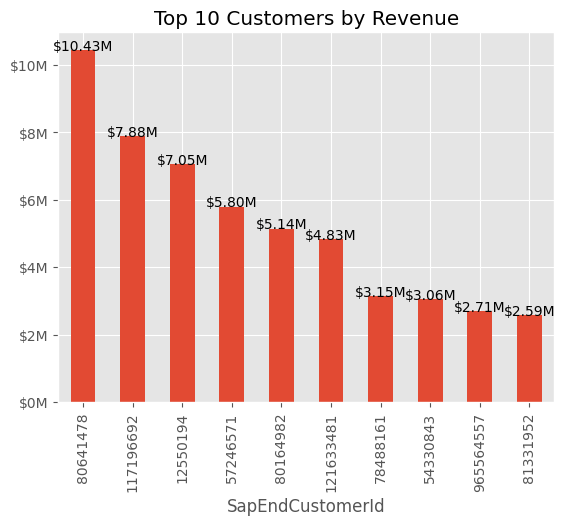

In [16]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# group the dataframe by 'SapEndCustomerId' and aggregate by sum of 'SapExtendedValue'
grouped = last_two_years.groupby('SapEndCustomerId')['SapExtendedValue'].sum().sort_values(ascending=False)

# plot the top 10 results
top_10 = grouped.head(10)
ax = top_10.plot(kind='bar')

# Format y-axis tick labels as millions and set y-axis limits
max_value = top_10.max()
y_padding = max_value * 0.05  # 5% padding
y_ticks = mtick.FuncFormatter(lambda x, pos: f'${x/1000000:.0f}M')
ax.set_ylim([0, max_value + y_padding])
ax.yaxis.set_major_formatter(y_ticks)

# Add data labels to the bar plot with some padding
padding = 0.5
for i, v in enumerate(top_10):
    ax.text(i, v + padding, f'${v/1000000:.2f}M', ha='center')

plt.title('Top 10 Customers by Revenue')
plt.show()

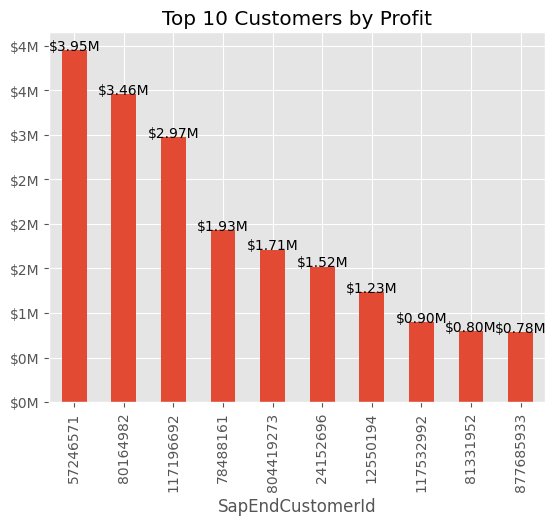

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# calculate the profit for each transaction
last_two_years = last_two_years.assign(Profit=last_two_years['SapExtendedValue'] - last_two_years['ExtendedValue'])

# group the dataframe by 'SapEndCustomerId' and aggregate by sum of 'Profit'
grouped = last_two_years.groupby('SapEndCustomerId')['Profit'].sum().sort_values(ascending=False)

# plot the top 10 results
top_10 = grouped.head(10)
ax = top_10.plot(kind='bar')

# Format y-axis tick labels as millions and set y-axis limits
max_value = top_10.max()
y_padding = max_value * 0.05  # 5% padding
y_ticks = mtick.FuncFormatter(lambda x, pos: f'${x/1000000:.0f}M')
ax.set_ylim([0, max_value + y_padding])
ax.yaxis.set_major_formatter(y_ticks)

# Add data labels to the bar plot with some padding
padding = 1.5
for i, v in enumerate(top_10):
    ax.text(i, v + padding, f'${v/1000000:.2f}M', ha='center')

plt.title('Top 10 Customers by Profit')
plt.show()

## sales of the highest selling distributor in July 2021

In [18]:
# Filter the DataFrame to only include transactions in July 2021
july_2021_sales = sales[(sales['TransactionDate'].dt.month == 7) & (sales['TransactionDate'].dt.year == 2021)]

In [19]:
july_2021_sales['DistributorName'].nunique()

3

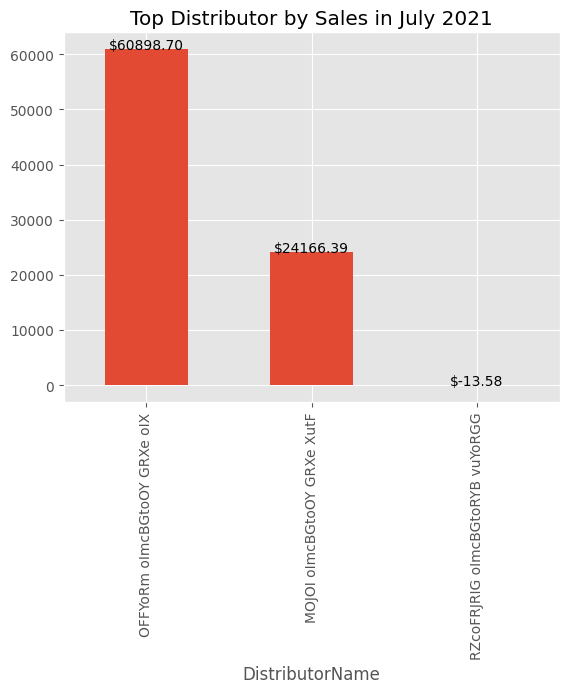

In [20]:
# group the dataframe by 'DistributorName' and aggregate by sum of 'SapExtendedValue'
grouped = july_2021_sales.groupby('DistributorName')['SapExtendedValue'].sum().sort_values(ascending=False)

# plot the top 2 results
top_3 = grouped.head(3)
ax = top_3.plot(kind='bar')

# Add data labels to the bar plot
for i, v in enumerate(top_3):
    ax.text(i, v + 1, f'${v:.2f}', ha='center')

plt.title('Top Distributor by Sales in July 2021')
plt.show()


In [21]:
products.head()

,Material Number,Material,ACM Application L1 Ver,ACM Application L2 Ver2,A Product Line/Application L1,A Product Line/Application L2,A Product Line/Application L3
0,229966,YuXGoGR OO 317/734 MG RI/mR,Sub-Component Assembly,Plastic and Rubber Component Bonding,StructuralAdhesives(SA),SA_IndustrialStructuralBonding(ISB),SA_ISB_Adhesive-Acrylate
1,229972,YuXGoGR OO 319 MG5S+10 JRBe mR,Sub-Component Assembly,Plastic and Rubber Component Bonding,StructuralAdhesives(SA),SA_IndustrialStructuralBonding(ISB),SA_ISB_Adhesive-Acrylate-Kit
2,249998,YuXGoGR OO 319/7649 MG5S/4JY mR,Structural & Flexible Assembly,Flexible Bonding and Sealing,StructuralAdhesives(SA),SA_IndustrialStructuralBonding(ISB),SA_ISB_Adhesive-Acrylate-Kit
3,1716460,FG 725 + Sjzx-/YzgA-FncRin 100 Rj,Structural & Flexible Assembly,Direct Glazing,FlexibleBonding&Sealing(FBS),FBS_DirectGlazing(DGX),FBS_DGX_Activators&Primers
4,1716437,FG 725 + Sjzx-/YzgA-FncRin 250 Rj,Structural & Flexible Assembly,Flexible Bonding and Sealing,FlexibleBonding&Sealing(FBS),FBS_DirectGlazing(DGX),FBS_DGX_Activators&Primers


In [22]:
# set the display format for floating-point numbers
pd.options.display.float_format = '{:.0f}'.format

# count the number of occurrences of each unique value in the 'Material Number' column
counts = products['Material Number'].value_counts()

# reset the display format to the default
pd.options.display.float_format = None

# display the counts
print(counts)

229966     1
1499218    1
1535340    1
1535339    1
1526550    1
          ..
1115798    1
1652422    1
504589     1
1214293    1
1575079    1
Name: Material Number, Length: 19882, dtype: int64


In [23]:
merged = sales.merge(products, how='left', left_on='SapMaterialIdh', right_on='Material Number')

In [24]:
merged

,TransactionDate,DistributorName,SapMaterialIdh,Quantity,DistributorUnitCost,SapUnitPrice,ExtendedValue,SapExtendedValue,SapEndCustomerId,EndCustomerName,Material Number,Material,ACM Application L1 Ver,ACM Application L2 Ver2,A Product Line/Application L1,A Product Line/Application L2,A Product Line/Application L3
0,2018-09-14,O YucoB BcFFYy XuJFOIy,198819,2.0,5.81,6.04,11.62,12.08,604393355,OxXHz XXiRcgzjx oQg.,198819.0,YuXGoGR Jt SB2 SOBMRG BROYOIG,Mechanical Assembly,Gasketing,GasketingMaterial(GKM),GKM_FormedInPlace(FIP),GKM_FIP_SolventBased
1,2018-09-14,O YucoB BcFFYy XuJFOIy,88551,47.0,10.49,10.91,493.03,512.77,4172623,GXi YGoncVyj XynZynzHcyQ,88551.0,YuXGoGR 565 FBG BROYOIG 50JY,Mechanical Assembly,Threadsealing,MachineryAdhesives(MA),MA_Threadsealing(TS),MA_TS_Threadsealing-Anaerobic
2,2018-09-14,O YucoB BcFFYy XuJFOIy,235572,3.0,46.51,48.37,139.53,145.11,80130658,"SOstoRY FRtkutJOIXR FtumcXGB, YYX",235572.0,YuXGoGR FX 9410 MG1SOYRI,Surface Repair & Protection,Flooring,Protection&RepairMaterial(PRM),PRM_RepairCompounds(RP),PRM_RP_FloorGrout&Chocking
3,2018-09-14,O YucoB BcFFYy XuJFOIy,135507,12.0,4.75,5.13,57.00,61.56,830087784,JtX Sjyozj (Gx) oQg.,135507.0,YuXGoGR Bo 596 tm su80JY,Mechanical Assembly,Gasketing,GasketingMaterial(GKM),GKM_FormedInPlace(FIP),GKM_FIP_Silicone
4,2018-09-14,O YucoB BcFFYy XuJFOIy,135354,20.0,8.93,9.28,178.60,185.60,830087784,JtX Sjyozj (Gx) oQg.,135354.0,YuXGoGR 242 tRJuhOsYR GY 10JY 10BX,Mechanical Assembly,Threadlocking,MachineryAdhesives(MA),MA_Threadlocking(TL),MA_TL_Threadlocking-Anaerobic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3287076,2017-12-22,t B ecSeRB Xu oIX,593831,1.0,815.99,815.99,815.99,815.99,1468669,FnigcxcyQ Sizn oQUGxHncix YYX,593831.0,suImRtoGR J-JI YcstoGR 2 mt263MS,Complementary,Corrosion Protection Coatings,SurfaceTreatmentProcess(STP),STP_ConversionCoatingProcess(CCP),STP_CCP_MnPhosConversionCoating
3287077,2017-12-22,t B ecSeRB Xu oIX,596971,5.0,219.53,219.53,1097.65,1097.65,557179368,ROZiUcHiU wynjU XznSy oQg.,596971.0,suImRtoGR B-BG 5351 ORtu,Surface Repair & Protection,Cleaning,Cleaners(CN),CN_AviationCleaners(AC),CN_AC_PaintStripper
3287078,2017-12-22,t B ecSeRB Xu oIX,596971,-5.0,219.53,219.53,-1097.65,-1097.65,557179368,ROZiUcHiU wynjU XznSy oQg.,596971.0,suImRtoGR B-BG 5351 ORtu,Surface Repair & Protection,Cleaning,Cleaners(CN),CN_AviationCleaners(AC),CN_AC_PaintStripper
3287079,2017-12-22,t B ecSeRB Xu oIX,596971,5.0,219.53,219.53,1097.65,1097.65,557179368,ROZiUcHiU wynjU XznSy oQg.,596971.0,suImRtoGR B-BG 5351 ORtu,Surface Repair & Protection,Cleaning,Cleaners(CN),CN_AviationCleaners(AC),CN_AC_PaintStripper


In [25]:
merged.shape

(3287081, 17)

In [26]:
merged["A Product Line/Application L2"].isnull().sum()

24569

In [27]:
merged["A Product Line/Application L2"].value_counts()

MA_Threadlocking(TL)                   891285
LC_Anti-Seize(AS)                      312868
MA_Threadsealing(TS)                   312670
GKM_FormedInPlace(FIP)                 289392
IA_GenPurp-SurfaceInsensitive(GPSI)    289225
                                        ...  
LC_MetalForming-Coil(MFC)                   7
EAS_ComponentAssemblyAdhesives(CAA)         7
STP_PlasticSurfaceTreatment(PST)            6
EQ_AdhesiveDeliveryEquipment(ADE)           4
EQ_CustomEquipment(CE)                      3
Name: A Product Line/Application L2, Length: 76, dtype: int64

In [28]:
# extract the month and year from the 'TransactionDate' column
merged['TransactionMonthYear'] = pd.to_datetime(merged['TransactionDate']).dt.to_period('M')

# group the 'merged' DataFrame by 'A Product Line/Application L2' and 'TransactionMonthYear', and aggregate the 'SapExtendedValue' column
grouped = merged.groupby(['A Product Line/Application L2', 'TransactionMonthYear'])['SapExtendedValue'].sum()

# reset the index of the resulting DataFrame
grouped = grouped.reset_index()


In [29]:
grouped

,A Product Line/Application L2,TransactionMonthYear,SapExtendedValue
0,CN_AviationCleaners(AC),2017-02,1134.98
1,CN_AviationCleaners(AC),2017-03,11461.22
2,CN_AviationCleaners(AC),2017-04,4486.10
3,CN_AviationCleaners(AC),2017-05,3669.88
4,CN_AviationCleaners(AC),2017-06,2580.62
...,...,...,...
3621,TMM_Adhesives(AD),2017-08,1273.05
3622,TMM_Adhesives(AD),2017-09,967.69
3623,TMM_Adhesives(AD),2017-10,1649.24
3624,TMM_Adhesives(AD),2017-11,1160.59


## Was there any specific application level 2 (product category) that was impacted more than the others

In [30]:
# calculate the variance for each product
product_variance = grouped.groupby('A Product Line/Application L2')['SapExtendedValue'].var()

# sort the products based on variance in descending order
sorted_products = product_variance.sort_values(ascending=False)

# get the top 10 products with maximum variance
top_products = sorted_products.head(10)


In [31]:
top_products

A Product Line/Application L2
SA_IndustrialStructuralBonding(ISB)      7.633406e+11
GKM_FormedInPlace(FIP)                   3.546188e+11
IA_LightCureInstantAdhesive(LCIA)        2.180860e+11
MA_Threadlocking(TL)                     1.511332e+11
EEC_Potting&Casting(POC)                 5.626999e+10
EQ_DispensingEquipment(DE)               4.935777e+10
IA_GenPurp-SurfaceInsensitive(GPSI)      3.004550e+10
MA_Threadsealing(TS)                     2.879990e+10
SM_MoldRelease(MR)                       2.745623e+10
IA_GenPurp-StandardEthyl&Methyl(GPST)    2.526491e+10
Name: SapExtendedValue, dtype: float64

In [32]:
for product_line in list(top_products.index):
    print(product_line)


SA_IndustrialStructuralBonding(ISB)
GKM_FormedInPlace(FIP)
IA_LightCureInstantAdhesive(LCIA)
MA_Threadlocking(TL)
EEC_Potting&Casting(POC)
EQ_DispensingEquipment(DE)
IA_GenPurp-SurfaceInsensitive(GPSI)
MA_Threadsealing(TS)
SM_MoldRelease(MR)
IA_GenPurp-StandardEthyl&Methyl(GPST)


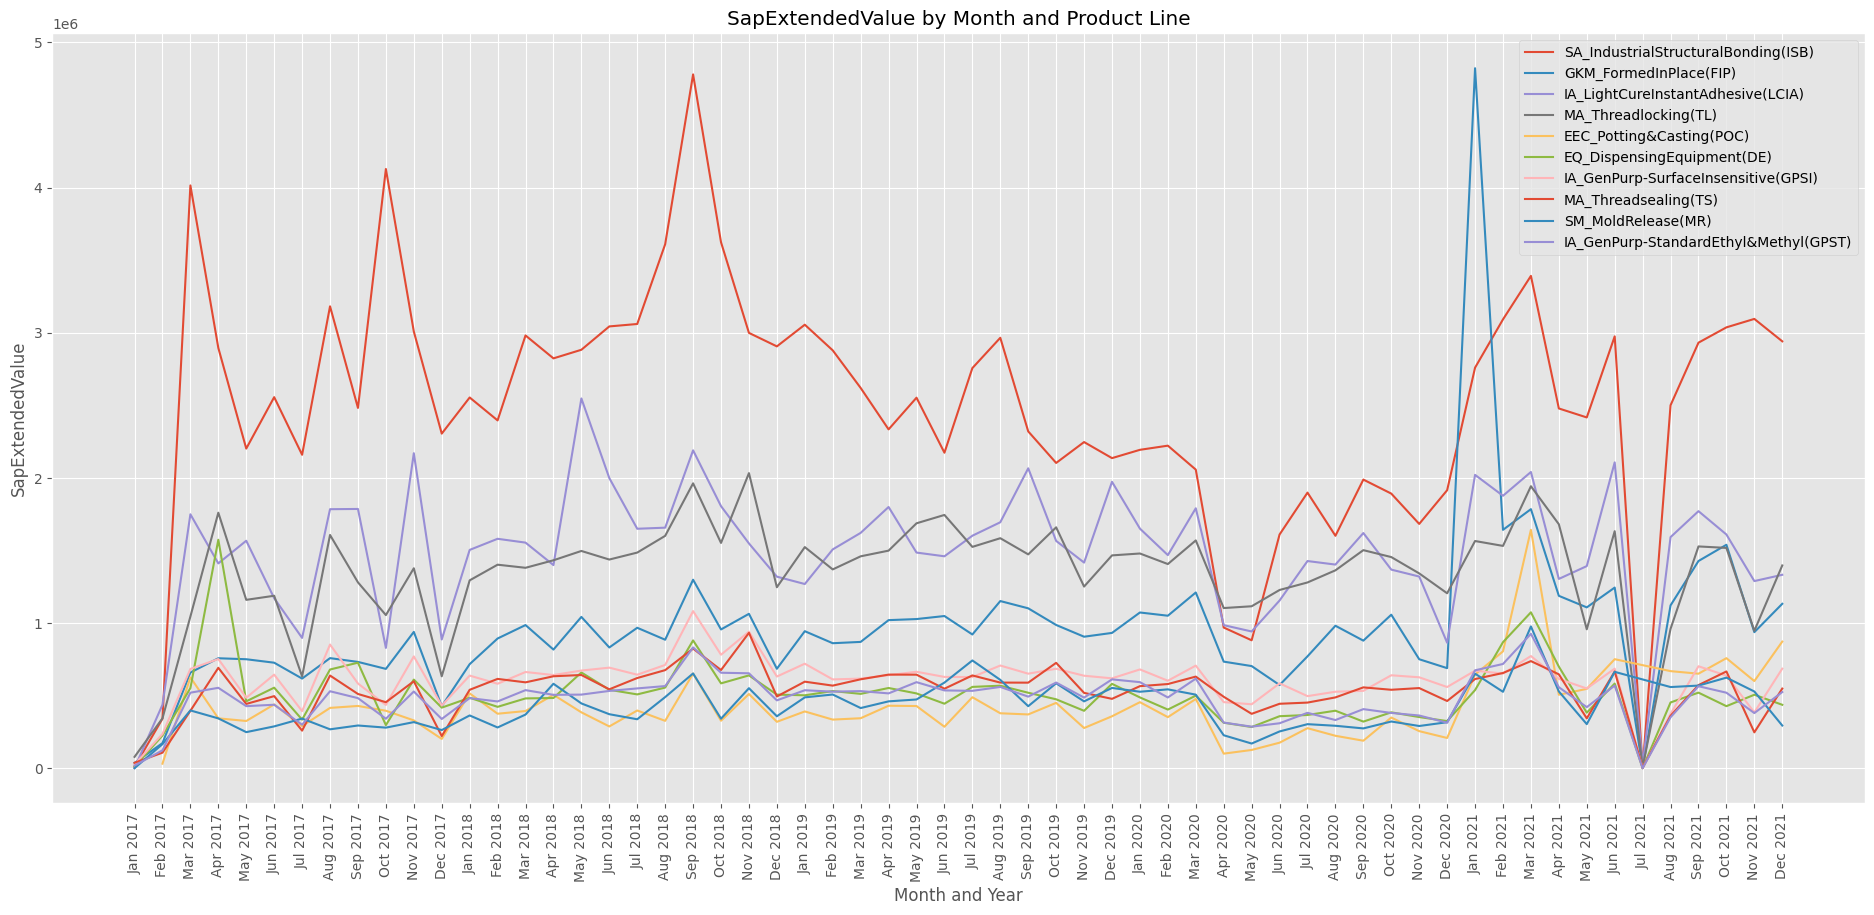

In [33]:
import matplotlib.pyplot as plt

# set the figure size
plt.figure(figsize=(25, 10))

# loop through each unique value in the 'A Product Line/Application L2' column
for product_line in list(top_products.index):
    # filter the 'grouped' DataFrame for the current product line
    product_data = grouped[grouped['A Product Line/Application L2'] == product_line]
    # create a time series line chart for the current product line
    product_data = product_data.copy()
    product_data.loc[:, 'TransactionMonthYear'] = product_data['TransactionMonthYear'].dt.strftime('%b %Y')
    plt.plot(product_data['TransactionMonthYear'], product_data['SapExtendedValue'], label=product_line)

# set the title and axis labels
plt.title('SapExtendedValue by Month and Product Line')
plt.xlabel('Month and Year')
plt.ylabel('SapExtendedValue')

# rotate the x-axis tick labels by 90 degrees
plt.xticks(rotation=90)

# adjust the spacing between subplots
plt.subplots_adjust(right=0.85)
# move legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# add a legend and show the plot
plt.legend()
plt.show()